In [1]:
# importation des librairies

#import os
import os
from os import walk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re

from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

import re
import mglearn

In [2]:
Train = pd.read_csv("NLP_project_train.csv")
# Y_train = pd.read_csv("NLP_project_train.csv")

Test = pd.read_csv("NLP_project_test.csv")
# Y_test = pd.read_csv("Nat_images_Y_test.csv")

In [3]:
Train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
Train['text'] = Train['text'].apply(lambda x : re.sub("0|1|2|3|4|5|6|7|8|9|\[|\]|\(|\)|\<|\>|\=|\+|\-|\#|\,|\.|\:|\;|\/","",x))

Train['text'].head()

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to 'shelter in place' are ...
3     people receive wildfires evacuation orders in...
4    Just got sent this photo from Ruby Alaska as s...
Name: text, dtype: object

In [5]:
# on découpe les tweets en mots
tweet_tokenizer = TweetTokenizer()

Train["tokens"]=Train["text"].apply(lambda x : tweet_tokenizer.tokenize(x))
Train.head()

#autre méthode Catherine
#tweet_tokens = []
#for sent in Train['text']:
#    tweet_tokens.append(tweet_tokenizer.tokenize(sent))
#print(tweet_tokens)

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, ', shelter, in, pl..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [6]:
# on supprime les mots qui commencent par http et @

def remove_tok(lst_token):
        
    good_token = []

    for i in range(len(lst_token)):
        good_token.append([])
        for token in lst_token[i]:
            if str(token).startswith("http") or str(token).startswith("@"):
                continue #lst_token.remove(token)
            else: 
                good_token[i].append(token)
                    
    return good_token

Train["good_tokens"]=remove_tok(Train["tokens"])

#Train["tokens"]=Train["tokens"].apply(lambda x: remove_tok(x) )

Train[["tokens","good_tokens"]]

,tokens,good_tokens
0,"[Our, Deeds, are, the, Reason, of, this, earth...","[Our, Deeds, are, the, Reason, of, this, earth..."
1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, Canada]"
2,"[All, residents, asked, to, ', shelter, in, pl...","[All, residents, asked, to, ', shelter, in, pl..."
3,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,"[Just, got, sent, this, photo, from, Ruby, Ala...","[Just, got, sent, this, photo, from, Ruby, Ala..."
...,...,...
7608,"[Two, giant, cranes, holding, a, bridge, colla...","[Two, giant, cranes, holding, a, bridge, colla..."
7609,"[@aria_ahrary, @TheTawniest, The, out, of, con...","[The, out, of, control, wild, fires, in, Calif..."
7610,"[M, UTC, ?, km, S, of, Volcano, Hawaii, httptc...","[M, UTC, ?, km, S, of, Volcano, Hawaii]"
7611,"[Police, investigating, after, an, ebike, coll...","[Police, investigating, after, an, ebike, coll..."


In [10]:
# Pour notre information : Vérification de la présence de double (même texte et même target
Double_T = Train.duplicated(subset=['text','target'], keep='first')
Double_T
verif_T=Train[Double_T]
verif_T

,id,keyword,location,text,target,tokens,good_tokens
48,68,ablaze,Live On Webcam,Check these out httptcorOINSmEJJ httptcoTjZjiN...,0,"[Check, these, out, httptcorOINSmEJJ, httptcoT...","[Check, these, out, nsfw]"
115,165,aftershock,US,IR ICEMOON AFTERSHOCK | httptcovAMPOdGyw | @d...,0,"[IR, ICEMOON, AFTERSHOCK, |, httptcovAMPOdGyw,...","[IR, ICEMOON, AFTERSHOCK, |, |, |, Dubstep, Tr..."
119,172,aftershock,Switzerland,IR ICEMOON AFTERSHOCK | httptcoTHyzOMVWU | @d...,0,"[IR, ICEMOON, AFTERSHOCK, |, httptcoTHyzOMVWU,...","[IR, ICEMOON, AFTERSHOCK, |, |, |, Dubstep, Tr..."
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1,"[Experts, in, France, begin, examining, airpla...","[Experts, in, France, begin, examining, airpla..."
350,502,army,NaN,Beyonce Is my pick for httptcothoYhrHkfJ Fan A...,0,"[Beyonce, Is, my, pick, for, httptcothoYhrHkfJ...","[Beyonce, Is, my, pick, for, Fan, Army, Beyhive]"
...,...,...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt ...,1,"[Evacuation, order, lifted, for, town, of, Roo...","[Evacuation, order, lifted, for, town, of, Roo..."
7607,10867,NaN,NaN,stormchase Violent Record Breaking EF El Reno ...,1,"[stormchase, Violent, Record, Breaking, EF, El...","[stormchase, Violent, Record, Breaking, EF, El..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...","[The, out, of, control, wild, fires, in, Calif..."
7610,10871,NaN,NaN,M UTC?km S of Volcano Hawaii httptcozDtoydEbJ,1,"[M, UTC, ?, km, S, of, Volcano, Hawaii, httptc...","[M, UTC, ?, km, S, of, Volcano, Hawaii]"


In [7]:
# On sélectionne tous les textes doubles
Double_T = Train.duplicated(subset=['text'], keep=False)
Double_T
Verif_T=Train[Double_T]
Verif_T

,id,keyword,location,text,target,tokens,good_tokens
40,59,ablaze,Live On Webcam,Check these out httptcorOINSmEJJ httptcoTjZjiN...,0,"[Check, these, out, httptcorOINSmEJJ, httptcoT...","[Check, these, out, nsfw]"
48,68,ablaze,Live On Webcam,Check these out httptcorOINSmEJJ httptcoTjZjiN...,0,"[Check, these, out, httptcorOINSmEJJ, httptcoT...","[Check, these, out, nsfw]"
106,156,aftershock,US,IR ICEMOON AFTERSHOCK | httptcovAMPOdGyw | @d...,0,"[IR, ICEMOON, AFTERSHOCK, |, httptcovAMPOdGyw,...","[IR, ICEMOON, AFTERSHOCK, |, |, |, Dubstep, Tr..."
115,165,aftershock,US,IR ICEMOON AFTERSHOCK | httptcovAMPOdGyw | @d...,0,"[IR, ICEMOON, AFTERSHOCK, |, httptcovAMPOdGyw,...","[IR, ICEMOON, AFTERSHOCK, |, |, |, Dubstep, Tr..."
118,171,aftershock,Switzerland,IR ICEMOON AFTERSHOCK | httptcoTHyzOMVWU | @d...,0,"[IR, ICEMOON, AFTERSHOCK, |, httptcoTHyzOMVWU,...","[IR, ICEMOON, AFTERSHOCK, |, |, |, Dubstep, Tr..."
...,...,...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt ...,1,"[Evacuation, order, lifted, for, town, of, Roo...","[Evacuation, order, lifted, for, town, of, Roo..."
7607,10867,NaN,NaN,stormchase Violent Record Breaking EF El Reno ...,1,"[stormchase, Violent, Record, Breaking, EF, El...","[stormchase, Violent, Record, Breaking, EF, El..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...","[The, out, of, control, wild, fires, in, Calif..."
7610,10871,NaN,NaN,M UTC?km S of Volcano Hawaii httptcozDtoydEbJ,1,"[M, UTC, ?, km, S, of, Volcano, Hawaii, httptc...","[M, UTC, ?, km, S, of, Volcano, Hawaii]"


In [8]:
# récuperer les tweets de même texte mais de target différente.
Temp_1=pd.DataFrame()

def chaine(lst_token):
    ans = ""
    for GT in lst_token:
        ans=ans+" "+str(GT)
    return ans

# ajout de la target dans chacune des chaines de caractères
Temp_1["chaine"]=Verif_T["good_tokens"].apply(lambda x: chaine(x))

Temp_1["ChaineEtTarget"]=Temp_1["chaine"]+Verif_T["target"].astype(str)

In [9]:
# On vérifie que Temp_1 comprend des textes doubles avec des target différentes en pointant les dupplicats
Double_T2 = Temp_1.duplicated(subset=['ChaineEtTarget'], keep='first')
Verif_T2=Temp_1[Double_T2]  # Double_T2 fonctionne comme un filtre

In [14]:
Verif_T2["ChaineEtTarget"].to_csv('00_ChaineEtTarget.csv', sep=';',index=True)

In [10]:
Verif_T3 = Verif_T2.groupby('chaine').groups
Verif_T3 = pd.DataFrame(list(Verif_T3.items()), columns = ['text','position des doubles'])
Verif_T3["len_liste"]=Verif_T3["position des doubles"].apply(lambda x:len(x))
Verif_T3

,text,position des doubles,len_liste
0,' Suicide bombing at location named ' premoni...,"Int64Index([6449], dtype='int64')",1
1,Allah describes piling up wealth thinking it ...,"Int64Index([4299], dtype='int64')",1
2,Are you another Standuser ? If you are I will...,"Int64Index([2651, 2655, 2666, 2674, 2679], dty...",5
3,Bestnaijamade yr old PKK suicide bomber who d...,"Int64Index([6366, 6373, 6377, 6378, 6392], dty...",5
4,Beware of your temper and a loose tongue ! Th...,"Int64Index([4291, 4303], dtype='int64')",2
...,...,...,...
58,not upset with a rally upset with burning bui...,"Int64Index([1343], dtype='int64')",1
59,stormchase Violent Record Breaking EF El Reno...,"Int64Index([7607], dtype='int64')",1
60,that exploded & amp brought about the beginni...,"Int64Index([3461], dtype='int64')",1
61,that horrible sinking feeling when you  Ûªve...,"Int64Index([6103, 6123], dtype='int64')",2


In [11]:
Filtre_T3=Verif_T3["len_liste"].apply(lambda x:x>1)
Verif_T3[Filtre_T3]

,text,position des doubles,len_liste
2,Are you another Standuser ? If you are I will...,"Int64Index([2651, 2655, 2666, 2674, 2679], dty...",5
3,Bestnaijamade yr old PKK suicide bomber who d...,"Int64Index([6366, 6373, 6377, 6378, 6392], dty...",5
4,Beware of your temper and a loose tongue ! Th...,"Int64Index([4291, 4303], dtype='int64')",2
5,Beyonce Is my pick for Fan Army Beyhive,"Int64Index([349, 350, 364, 370, 371, 372, 373]...",7
6,Black Eye A space battle occurred at Star O i...,"Int64Index([2582, 2590, 2591, 2593, 2604, 2607...",7
15,He came to a land which was engulfed in triba...,"Int64Index([3248, 3251, 3261, 3266], dtype='in...",4
21,IR ICEMOON AFTERSHOCK | | | Dubstep TrapMusic...,"Int64Index([115, 118, 119], dtype='int64')",3
26,Madhya Pradesh Train Derailment Village Youth...,"Int64Index([2441, 2449, 2454, 2477], dtype='in...",4
27,Madhya Pradesh Train Derailment Village Youth...,"Int64Index([2452, 2456], dtype='int64')",2
31,One Direction Is my pick for Fan Army Directi...,"Int64Index([351, 360, 365, 378], dtype='int64')",4


In [12]:
Verif_T3[Filtre_T3].shape[0]

17

In [13]:
Liste_ID=[]

for POS in Verif_T3["position des doubles"]:
    compare = Verif_T2.loc[POS[0],"ChaineEtTarget"]
    for ID in POS[1:]:
        if Verif_T2.loc[ID,"ChaineEtTarget"]== compare:
            continue
        else :
            Liste_ID.append(compare)
            Liste_ID.append(POS[0])
            Liste_ID.append(Verif_T2.loc[ID,"ChaineEtTarget"])
            Liste_ID.append(ID)
            break

Liste_ID

[' He came to a land which was engulfed in tribal war and turned it into a land of peace ie Madinah ProphetMuhammad islam1',
 3248,
 ' He came to a land which was engulfed in tribal war and turned it into a land of peace ie Madinah ProphetMuhammad islam0',
 3251,
 " The Prophet peace be upon him said ' Save yourself from Hellfire even if it is by giving half a date in charity '0",
 4286,
 " The Prophet peace be upon him said ' Save yourself from Hellfire even if it is by giving half a date in charity '1",
 4318,
 ' To fight bioterrorism sir1',
 630,
 ' To fight bioterrorism sir0',
 634,
 ' that horrible sinking feeling when you \x89 Ûªve been at home on your phone for a while and you realise its been on G this whole time0',
 6103,
 ' that horrible sinking feeling when you \x89 Ûªve been at home on your phone for a while and you realise its been on G this whole time1',
 6123]

In [14]:
#On supprime les taxtes qui ont une target différente
Train2=Train.drop([3248,4318,630,6103],inplace=False)
Train2.head()

,id,keyword,location,text,target,tokens,good_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,"[Our, Deeds, are, the, Reason, of, this, earth...","[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, ', shelter, in, pl...","[All, residents, asked, to, ', shelter, in, pl..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,"[Just, got, sent, this, photo, from, Ruby, Ala...","[Just, got, sent, this, photo, from, Ruby, Ala..."


## Préparation des colonnes des fichiers Train

In [15]:
Train2["target"].value_counts()

0    4341
1    3268
Name: target, dtype: int64

In [16]:
Train2["text"]=Train2["good_tokens"].apply(lambda x: chaine(x))
Train2

,id,keyword,location,text,target,tokens,good_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, earth...","[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to ' shelter in place ' a...,1,"[All, residents, asked, to, ', shelter, in, pl...","[All, residents, asked, to, ', shelter, in, pl..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, Ala...","[Just, got, sent, this, photo, from, Ruby, Ala..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse in...,1,"[Two, giant, cranes, holding, a, bridge, colla...","[Two, giant, cranes, holding, a, bridge, colla..."
7609,10870,NaN,NaN,The out of control wild fires in California e...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...","[The, out, of, control, wild, fires, in, Calif..."
7610,10871,NaN,NaN,M UTC ? km S of Volcano Hawaii,1,"[M, UTC, ?, km, S, of, Volcano, Hawaii, httptc...","[M, UTC, ?, km, S, of, Volcano, Hawaii]"
7611,10872,NaN,NaN,Police investigating after an ebike collided ...,1,"[Police, investigating, after, an, ebike, coll...","[Police, investigating, after, an, ebike, coll..."


In [17]:
Train2["keyword"].fillna(value = "", inplace=True)
Train2["location"].fillna(value = "", inplace=True)

In [18]:
Train2["text"]=Train2["text"]+" "+Train2["keyword"]+" "+Train2["location"]

In [19]:
Train2.loc[0,"text"]

' Our Deeds are the Reason of this earthquake May ALLAH Forgive us all  '

### Division du X_train en 2 sous jeu de données car pas de target dans X_test

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(Train2.drop(columns=["target","good_tokens","tokens","id"]),Train2["target"], test_size=0.25, random_state=42, stratify=Train2["target"])

In [21]:
X_train

,keyword,location,text
5546,rainstorm,vancouver usa,& ltgasp ! & gt I forgot Sunday ! OMG rainsto...
7108,violent%20storm,Your Six,Desert Storm was an unqualified victory a tre...
4967,meltdown,The shores of Lake Kilby,Ever since my Facebook Mets meltdown after th...
1169,bridge%20collapse,PROUD INDIANS,Bridge collapse not natural calamity but manm...
888,bloody,"Sunshine Coast, Queensland",Hey Sally sorry have you emailed me ? Been AW...
...,...,...,...
2695,detonation,,Ignition Knock Detonation SensorSenso BECKARN...
3706,fear,,The things we fear most in organizationsfluct...
941,blown%20up,,Guaranteed been bitten by some mutant mosquit...
5651,rescue,#HarleyChick#PJNT#RunBenRun,Coastal German Shepherd Rescue OC shared a li...


In [27]:
Y_train

5546    0
7108    1
4967    0
1169    1
888     0
       ..
2695    1
3706    0
941     0
5651    0
4467    0
Name: target, Length: 5706, dtype: int64

In [55]:
X_train.to_csv('NLP_X_Train.csv', sep=';',index=True)
Y_train.to_csv('NLP_Y_Train.csv', sep=';',index=True)
X_test.to_csv('NLP_X_Test.csv', sep=';',index=True)
Y_test.to_csv('NLP_Y_Test.csv', sep=';',index=True)

In [19]:
X_train = pd.read_csv('NLP_X_Train.csv', delimiter=';')
Y_train = pd.read_csv('NLP_Y_Train.csv', delimiter=';')
X_test = pd.read_csv('NLP_X_Test.csv', delimiter=';')
Y_test = pd.read_csv('NLP_Y_Test.csv', delimiter=';')

### Réalisation du dictionnaire de mots avec leur récurrence sans les 'stop words'

In [32]:
vect = CountVectorizer()
vect.fit(X_train["text"])

print("vocabulary size :",len(vect.vocabulary_))
#print("vocabulary content:\n", vect.vocabulary_)

vocabulary size : 14041


In [33]:
print ("number of stop words:", len(ENGLISH_STOP_WORDS))

number of stop words: 318


In [34]:
vect_stop = CountVectorizer(stop_words="english")
vect_stop.fit(X_train["text"])

CountVectorizer(stop_words='english')

In [35]:
print("vocabulary size :",len(vect_stop.vocabulary_))
#print("vocabulary content:\n", vect.vocabulary_)

vocabulary size : 13767


In [36]:
dico = vect_stop.transform(X_train["text"])
print("dense representation of dico:\n", dico.toarray())

dense representation of dico:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
dico.shape

(5706, 13767)

### 1 - Regression Logistique

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(LogisticRegression(), dico, Y_train, cv=5)
print("mean cross validation accuracy: ", np.mean(scores))

mean cross validation accuracy:  0.7853133715317163


In [57]:
param_grid= {'C': [0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(dico, Y_train)
print('best cv score :', grid.best_score_)
print('best parameters : ', grid.best_params_)

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best cv score : 0.7914468059633681
best parameters :  {'C': 0.1}


C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
dico_test = vect_stop.transform(X_test["text"])
print('test score :', grid.score(dico_test, Y_test))

test score : 0.8024172359432475


### 2 - TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [66]:
pipe = make_pipeline(TfidfVectorizer(min_df=5,stop_words="english", norm=None),LogisticRegression())

param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]} # on prend le paramètre C du logistic regression

grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train["text"], Y_train)
print("best crossvalidation score:",grid.best_score_)

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best crossvalidation score: 0.7807562727260169


In [67]:
vectorizer=grid.best_estimator_.named_steps["tfidfvectorizer"]
ponder = vectorizer.transform(X_train["text"])
max_value=ponder.max(axis=0).toarray().ravel()
sorted_by_tfidf=max_value.argsort()
feature_names=np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf :\n",feature_names[sorted_by_tfidf[:20]])
print("Features with highest tfidf :\n",feature_names[sorted_by_tfidf[-20:]])

Features with lowest tfidf :
 ['united' 'uk' 'know' 'fires' 'make' 'england' 'help' 'right' 'states'
 '20fires' '20storm' 'look' 'northern' 've' 'god' 'lol' '20disaster' 'tx'
 'los' 'hot']
Features with highest tfidf :
 ['ar' 'army' 'heights' 'route' 'somalia' 'di' 'amsterdam' 'check' 'trauma'
 'ok' 'sinkhole' 'fucking' 'bus' 'aug' 'issues' 'hey' 'bestnaijamade'
 'jst' 'gt' 'wreck']


In [68]:
sorted_by_idf=np.argsort(vectorizer.idf_)
print("Features with lowest idf :\n",feature_names[sorted_by_idf[:100]])
print("Features with highest idf :\n",feature_names[sorted_by_idf[-100:]])

Features with lowest idf :
 ['new' 'û_' 'like' 'just' 'usa' 'amp' 'news' 'don' 'california' 'people'
 'ca' 'emergency' 'video' 'york' 'world' 'city' 'disaster' 'police' 'body'
 'storm' 'burning' 'london' 'buildings' 'rt' 'time' 'united' 'uk' 'got'
 'know' 'nuclear' 'day' 'man' 'crash' 'suicide' 'going' 'love' 'canada'
 'attack' 'bomb' 'killed' 'today' 'let' 'war' 'dead' 'good' 'hiroshima'
 'fires' 'want' 'death' 'texas' 'washington' 'think' 'make' 'san' 'life'
 'work' 'pm' 'ûªs' 'australia' 'ny' 'car' 'say' 'need' 'train' 'accident'
 'england' 'way' 'years' 'watch' 'help' 'collapse' 'wildfire' 'south'
 'right' 'army' 'states' 'home' '20fires' '20storm' 'japan' 'mass' 'did'
 'st' 'god' 've' 'northern' 'look' 'really' 'forest' '20disaster' 'oh'
 'lol' 'state' 'best' 'tx' 'year' 'india' 'live' 'los' 'black']
Features with highest idf :
 ['path' 'smoking' 'sleep' 'saturday' 'scary' 'scheme' 'se' 'sees' 'senior'
 'sensorsenso' 'smithsonian' 'shame' 'sicily' 'sidelines' 'simple'
 'singapore'

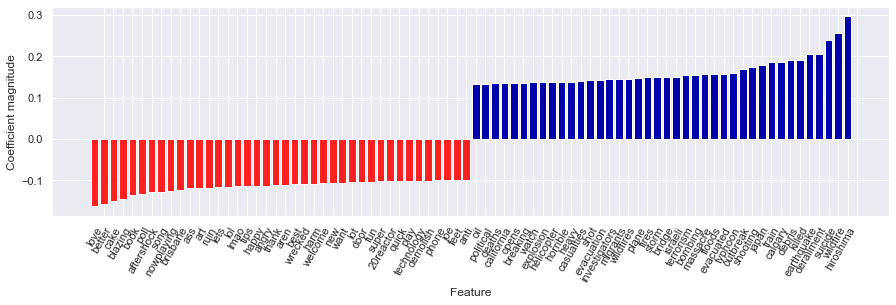

In [69]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names,n_top_features=40)


In [81]:
# Test de performance : Utilisation de max_df dans TF-IDF Vectoriser pour éliminer les mots qui apparaissent trop fréquemment

pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words="english", max_df=500, norm=None),LogisticRegression())

param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]} # on prend le paramètre C du logistic regression

grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train["text"], Y_train)
print("best crossvalidation score:",grid.best_score_)

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best crossvalidation score: 0.7807562727260169


In [82]:
# Test de performance :

vectorizer=grid.best_estimator_.named_steps["tfidfvectorizer"]
ponder = vectorizer.transform(X_train["text"])
max_value=ponder.max(axis=0).toarray().ravel()
sorted_by_tfidf=max_value.argsort()
feature_names=np.array(vectorizer.get_feature_names())


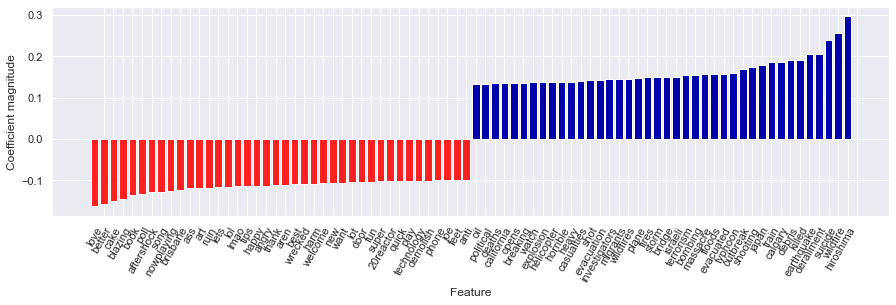

In [83]:
# Test de performance :

mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names,n_top_features=40)


### Sacs de mots

In [85]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, stop_words="english", norm=None),LogisticRegression())

param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10,100],"tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}

grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(X_train["text"], Y_train)
print("best crossvalidation score:",grid.best_score_)
print("best parameters:",grid.best_params_)

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

best crossvalidation score: 0.78338585227264
best parameters: {'logisticregression__C': 0.01, 'tfidfvectorizer__ngram_range': (1, 2)}


C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


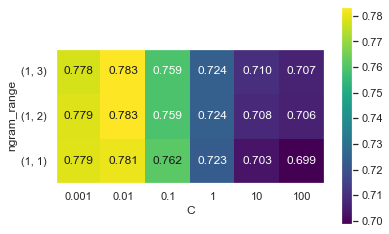

In [86]:
import matplotlib.pyplot as plt

scores=grid.cv_results_["mean_test_score"].reshape(-1,3).T
heatmap=mglearn.tools.heatmap(scores,xlabel="C",ylabel="ngram_range",cmap="viridis", fmt="%.3f", xticklabels=param_grid["logisticregression__C"],yticklabels=param_grid["tfidfvectorizer__ngram_range"])
plt.colorbar(heatmap)

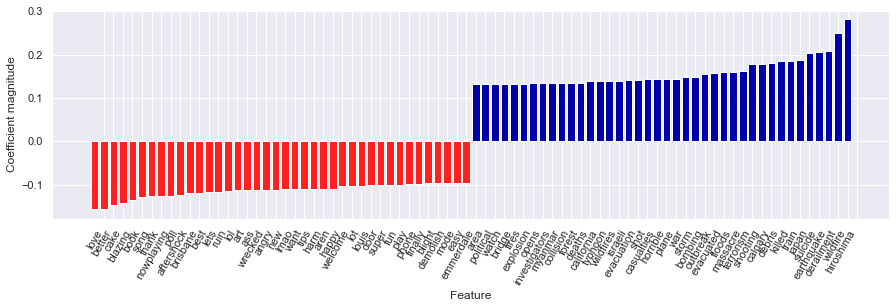

In [87]:
vectorizer=grid.best_estimator_.named_steps["tfidfvectorizer"]
feature_names=np.array(vectorizer.get_feature_names())

mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names,n_top_features=40)

### Racinisation & Lemmatisation

In [22]:
import spacy
import nltk

In [ ]:
#import re
#regexp=re.compile("(?u)\\b\\w\\w+\\b")

#en_nlp= spacy.load("en")
#old_tokenizer=en_nlp.tokenizer

#en_nlp.tokenizer= lambda string : old_tokenizer.tokens_from_list(regexp.findall(string))


In [3]:
# Pour tester : Comparaison de la lemmatisation et de la racinisation
en_nlp= spacy.load("en_core_web_sm")

stemmer=nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy=en_nlp(doc)
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming/Racinisation:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    
compare_normalization("Our meeting today was worse than yesterday I am scared of meeting the clients tomorrow")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow']


In [23]:
regexp=re.compile("(?u)\\b\\w\\w+\\b")

#Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the words keyword argument, for example:
#from spacy.tokens import Doc
#doc = Doc(nlp.vocab, words=regexp.findall(string))

from spacy.tokens import Doc

en_nlp= spacy.load("en_core_web_sm")
old_tokenizer=en_nlp.tokenizer
#en_nlp.tokenizer= lambda string : old_tokenizer.tokens_from_list(regexp.findall(string))
en_nlp.tokenizer = lambda string: Doc(en_nlp.vocab, words = regexp.findall(string))

def lemma_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=lemma_tokenizer, min_df=5, stop_words="english")

X_train_lemma=lemma_vect.fit_transform(X_train["text"])
print("X_train_lemma.shape : ", X_train_lemma.shape)

# On constate que l'on passe d'un dico de 13767 mots à un dico de 2070 mots. Le premier nombre de X_train_lemma.shape correspond au nombre de tweets

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


X_train_lemma.shape :  (5706, 2026)


In [87]:
param_grid = {'C':[0.001,0.01,0.1,1,10]} # on prend le paramètre C du logistic regression

grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train_lemma, Y_train)
print("lemma best crossvalidation score:",grid.best_score_)

C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

lemma best crossvalidation score: 0.7875917674452158


C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cath_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Allocation de Dirichlet Latente (LDA)

In [35]:
# Groupement par sujet qui peuvent être de différents types : Par la thématique du texte ou par le style d'écriture des auteurs.

from sklearn.decomposition import LatentDirichletAllocation

lda=LatentDirichletAllocation(n_components=4,learning_method="online",max_iter=25,random_state=0)

tweet_topics=lda.fit_transform(X_train_lemma)

print("lda.components_.shape :",lda.components_.shape, "= (n_topics,n_words)")

lda.components_.shape : (4, 2026) = (n_topics,n_words)


In [36]:
#Affichage des différents topics

sorting=np.argsort(lda.components_,axis=1)[:,::-1]
feature_names=np.array(lemma_vect.get_feature_names())

mglearn.tools.print_topics(topics=range(4),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=30)

topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
body          burn          attack        I             
new           emergency     bomb          just          
û_            building      flood         crash         
nuclear       death         drown         don           
disaster      wreck         scream        like          
good          wound         suicide       casualty      
demolish      amp           weapon        time          
york          storm         kill          sink          
blow          fatality      destroy       survive       
panic         quarantine    injury        come          
united        california    evacuate      day           
damage        look          rescue        mass          
bag           new           police        deluge        
flame         explode       hostage       derail        
video         collide       war           collapse      
help          love          obl

In [86]:
#Il reste à faire la boucle sur tous les topics pour le mettre dans bilan_topics
Bilan_topics=pd.DataFrame(columns=["Topic","Target_Count"])

Target_verif_3 =pd.DataFrame(columns=["Word",'Tweet','Target',"Word_target"])
disaster=np.argsort(tweet_topics[:,3])[::-1]
for i in feature_names[:20]:
    Target_verif_3.loc[i,"Word"]=i
    #print(X_train["text"])
    Target_verif_3.loc[i,"Tweet"]= list(X_train[X_train["text"].str.contains(i)].index)
    Target_verif_3.loc[i,"Target"]= list(Y_train[Target_verif_3.loc[i,"Tweet"]])
    Target_verif_3.loc[i,"Word_target"]= np.argmax([Target_verif_3.loc[i,"Target"].count(0),Target_verif_3.loc[i,"Target"].count(1)]) 
    
Target_verif_3



Bilan_topics.loc[3,"Topic"]=3
Bilan_topics.loc[3,"Target_Count"]=int(Target_verif_3[Target_verif_3["Word_target"]==1]["Word_target"].value_counts())



Bilan_topics

#X_train.loc[i,"text"]

,Topic,Target_Count
3,3,13


In [38]:
X_train

,keyword,location,text
5546,rainstorm,vancouver usa,& ltgasp ! & gt I forgot Sunday ! OMG rainsto...
7108,violent%20storm,Your Six,Desert Storm was an unqualified victory a tre...
4967,meltdown,The shores of Lake Kilby,Ever since my Facebook Mets meltdown after th...
1169,bridge%20collapse,PROUD INDIANS,Bridge collapse not natural calamity but manm...
888,bloody,"Sunshine Coast, Queensland",Hey Sally sorry have you emailed me ? Been AW...
...,...,...,...
2695,detonation,,Ignition Knock Detonation SensorSenso BECKARN...
3706,fear,,The things we fear most in organizationsfluct...
941,blown%20up,,Guaranteed been bitten by some mutant mosquit...
5651,rescue,#HarleyChick#PJNT#RunBenRun,Coastal German Shepherd Rescue OC shared a li...


### Brouillon - Nettoyage des caractères spéciaux 

In [ ]:
for sent in Train['tokens']:  
    for j in sent:
        if j.startswith("http") or j.startswith("@"):
            sent.remove(j)

            
#for sent in Train['tokens']:  
 #   for j in sent:
  #      if j.startswith("#"):
   #         mot = str(j.split("#")[1])        
     #       sent.remove(j)
      #      sent.append(mot)
#            j.replace("#", "")
                    #print("enter")
                    #j.replace("#", "")
 #               j=str(j[1:])
 #           a = a+1
                    #print(j)
                    #print("exit")
 #               else:                    

print(Train['tokens'])

In [ ]:
#changement de noms de colonne TRUC=pd.DataFrame(verif[['text','target']], columns=['nom1','nom2'])
V = verif[['text','target']]

VT = verif_T[['text','target']]

essai = pd.concat([V, VT]) 


In [ ]:
Train2=Train

def repl(token):

    if token.__contains__("#"):
        return token.replace("#","")
    else :
        return token

Train2["tokens"]=Train2["tokens"].apply(lambda x: [ repl(token) for token in x ])

def remove_tok(lst_token):
        
    bad_tokens = ["http","@"]

    for token in lst_token :
        for i in bad_tokens :
            if str(token).startswith(str(i)):
                lst_token.remove(token)
            else : 
                continue
    
    return lst_token

Train2["tokens"]=Train2["tokens"].apply(lambda x: remove_tok(x) )

Train2["tokens"]

In [ ]:
list = X_train["text"]
X = pd.Series(list)
count = X.str.count("@")
display(count.sum())

In [ ]:
X_train["text"] = [phrase.replace("#"," ") for phrase in X_train["text"]]

In [ ]:
#spacy.cli.download("en_core_web_sm")

In [1]:
#!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=981a6ccedd34b21c9880618e0bfc6802f102b4471f89b38204d80a24b8c2d6be
  Stored in directory: c:\users\cath_\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [89]:
#!pip install spacy

In [ ]:
X_train["text"] = [phrase.replace("@"," ") for phrase in X_train["text"]]

In [ ]:
#X_train["target"].value_counts()